IBM HR Attrition - EDA and Modelling

Task : To generate the dashboard of the dataset and perform modelling of the data to predict the attrition of any Employee.



In [1]:
!pip install imbalanced-learn
!pip install delayed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [4]:
data = pd.read_csv("C:\\Users\\ashok kumar chaurasi\\Desktop\\hr analytics\\WA_Fn-Usec_-HR-Employee-Attrition.csv")

In [5]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Let us take a look at the columns to select and remove any unwanted columsn like ID

In [7]:
data.columns
data.drop(['EmployeeNumber'],axis=1,inplace=True)
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
data.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Exploratory Data Analysis - General Dataset Analysis


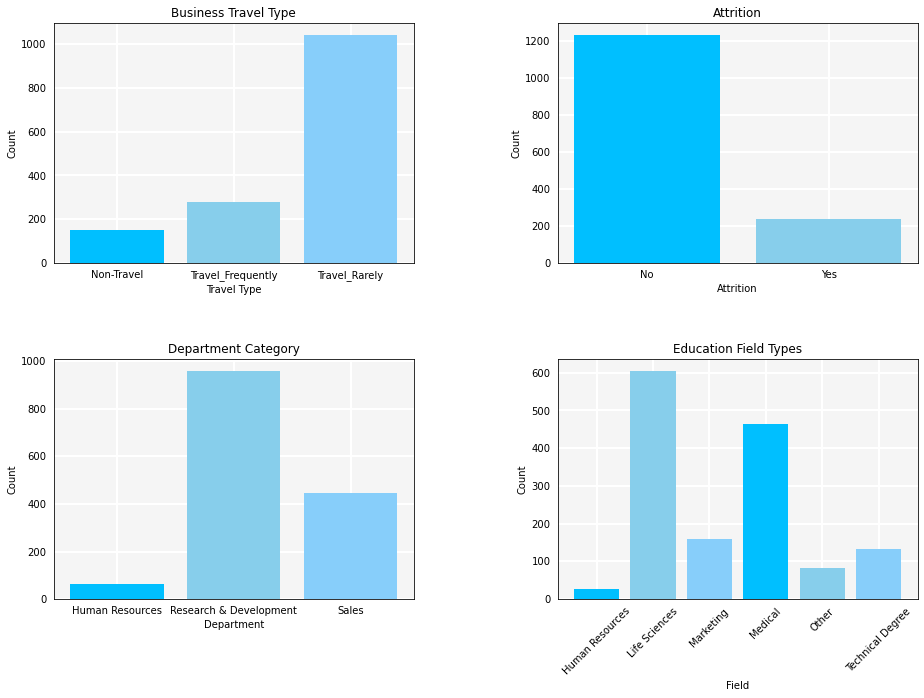

In [9]:
plt.rcParams.update({'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.subplot(2,2,1)
xaxis,counts = np.unique(data['BusinessTravel'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Business Travel Type")
plt.xlabel("Travel Type")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,2)
xaxis,counts = np.unique(data['Attrition'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,3)
xaxis,counts = np.unique(data['Department'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Department Category")
plt.xlabel("Department")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,4)
plt.xticks(rotation=45)
xaxis,counts = np.unique(data['EducationField'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Education Field Types")
plt.xlabel("Field")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')
plt.show()

Inference : Majority of the employess travel only Rarely for business purposes. The R&D Department has the highest number of employees with Life Sciences and Medical Degress with most in number. The attrition number is really less.



Exploratory Data Analysis - Category Wise Analysis


Business Travel Type : Non-Travel






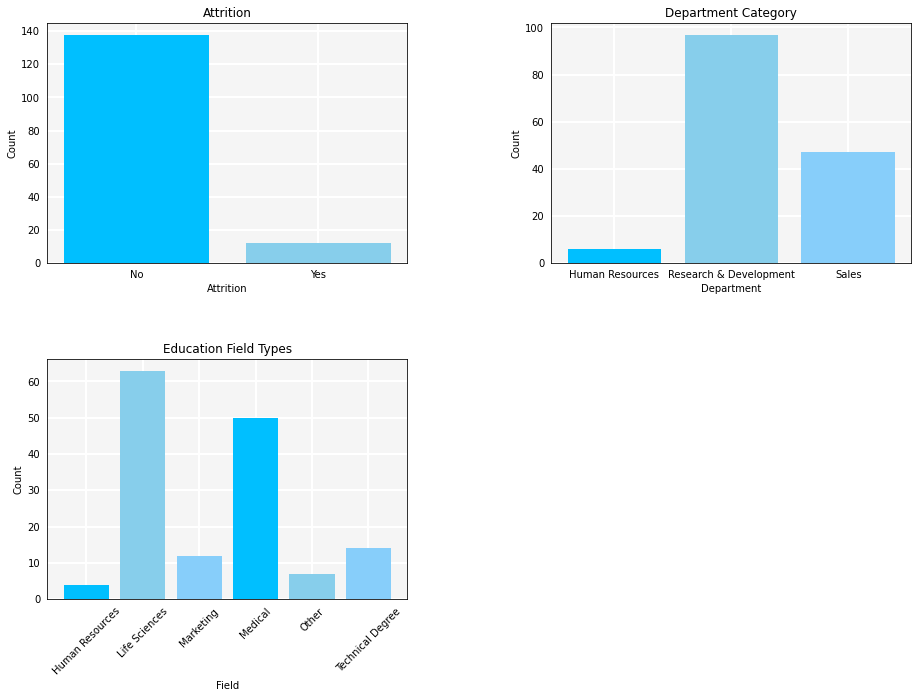

In [10]:
plt.rcParams.update({'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fitlered_data = data[data['BusinessTravel'] == "Non-Travel"]
plt.subplot(2,2,1)
xaxis,counts = np.unique(fitlered_data['Attrition'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,2)
xaxis,counts = np.unique(fitlered_data['Department'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Department Category")
plt.xlabel("Department")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,3)
plt.xticks(rotation=45)
xaxis,counts = np.unique(fitlered_data['EducationField'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Education Field Types")
plt.xlabel("Field")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')
plt.show()

Business Travel Type : Travel_Frequently



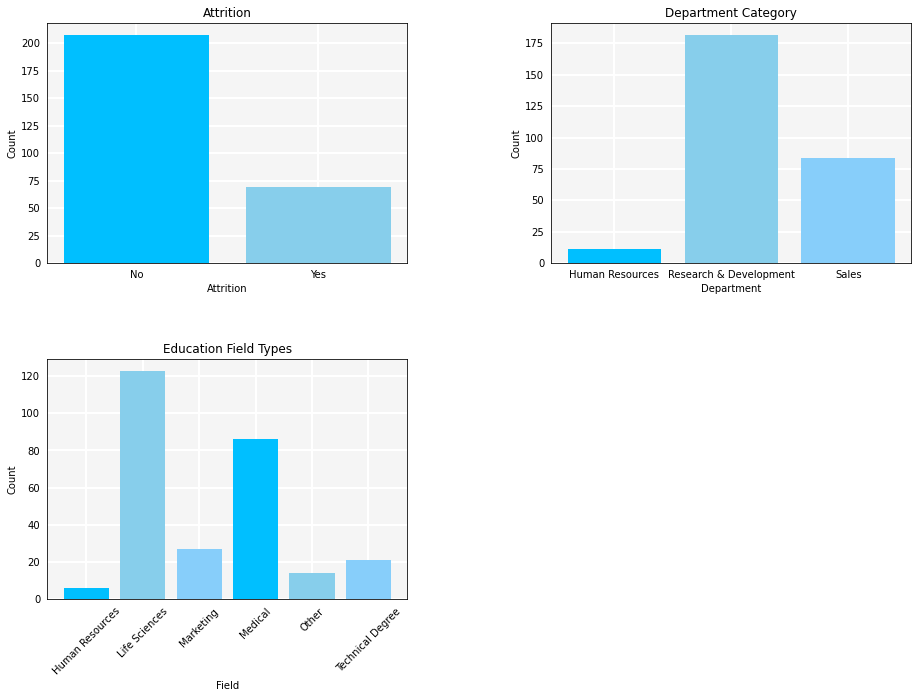

In [11]:
plt.rcParams.update({'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fitlered_data = data[data['BusinessTravel'] == "Travel_Frequently"]
plt.subplot(2,2,1)
xaxis,counts = np.unique(fitlered_data['Attrition'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,2)
xaxis,counts = np.unique(fitlered_data['Department'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Department Category")
plt.xlabel("Department")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,3)
plt.xticks(rotation=45)
xaxis,counts = np.unique(fitlered_data['EducationField'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Education Field Types")
plt.xlabel("Field")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')
plt.show()

Business Travel Type : Travel_Rarely



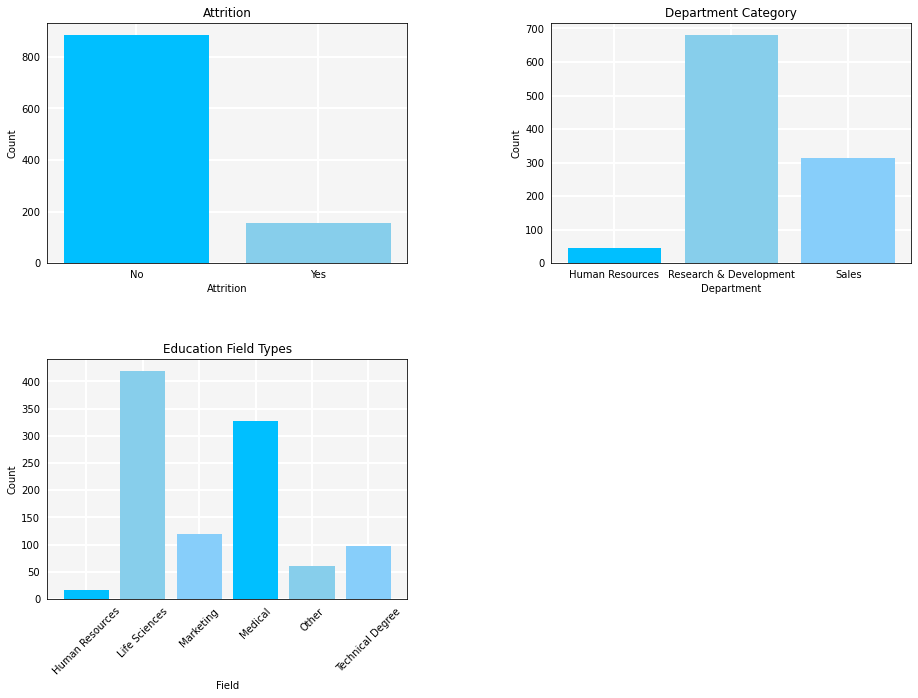

In [12]:
plt.rcParams.update({'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fitlered_data = data[data['BusinessTravel'] == "Travel_Rarely"]
plt.subplot(2,2,1)
xaxis,counts = np.unique(fitlered_data['Attrition'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,2)
xaxis,counts = np.unique(fitlered_data['Department'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Department Category")
plt.xlabel("Department")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,3)
plt.xticks(rotation=45)
xaxis,counts = np.unique(fitlered_data['EducationField'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Education Field Types")
plt.xlabel("Field")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')
plt.show()


Inference : For all three Business Travel Types (Non-Travelling, Travelling Frequently and Travelling Rarely), There is less Attirition Rate with majority of the employees working for R&D Department with their Education Field being Life Sciences and Medical.



Attrition Type : No



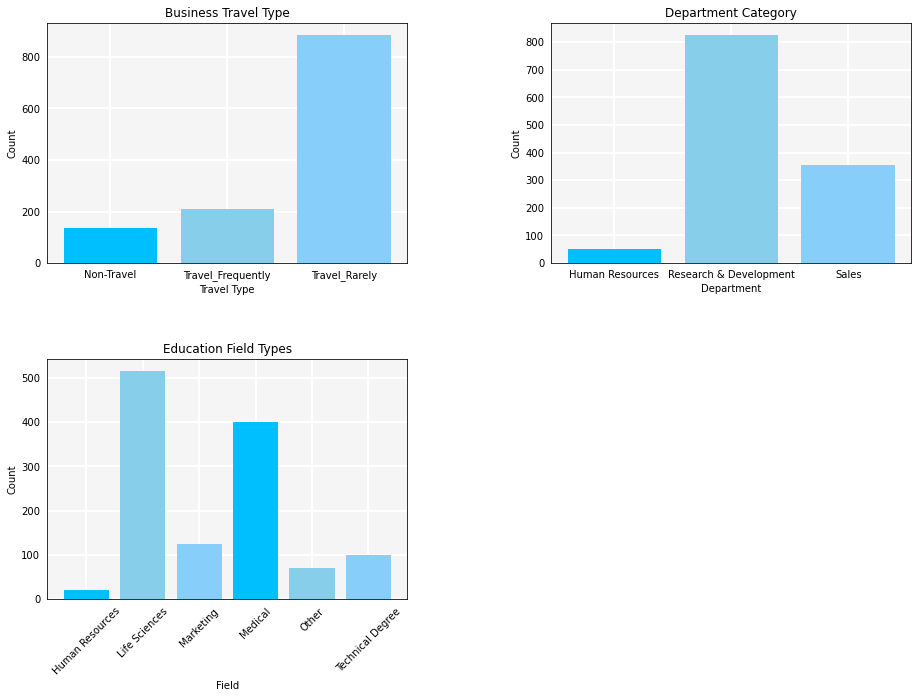

In [13]:
plt.rcParams.update({'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fitlered_data = data[data['Attrition'] == "No"]
plt.subplot(2,2,1)
xaxis,counts = np.unique(fitlered_data['BusinessTravel'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Business Travel Type")
plt.xlabel("Travel Type")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,2)
xaxis,counts = np.unique(fitlered_data['Department'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Department Category")
plt.xlabel("Department")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,3)
plt.xticks(rotation=45)
xaxis,counts = np.unique(fitlered_data['EducationField'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Education Field Types")
plt.xlabel("Field")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')
plt.show()

Attrition Type : Yes



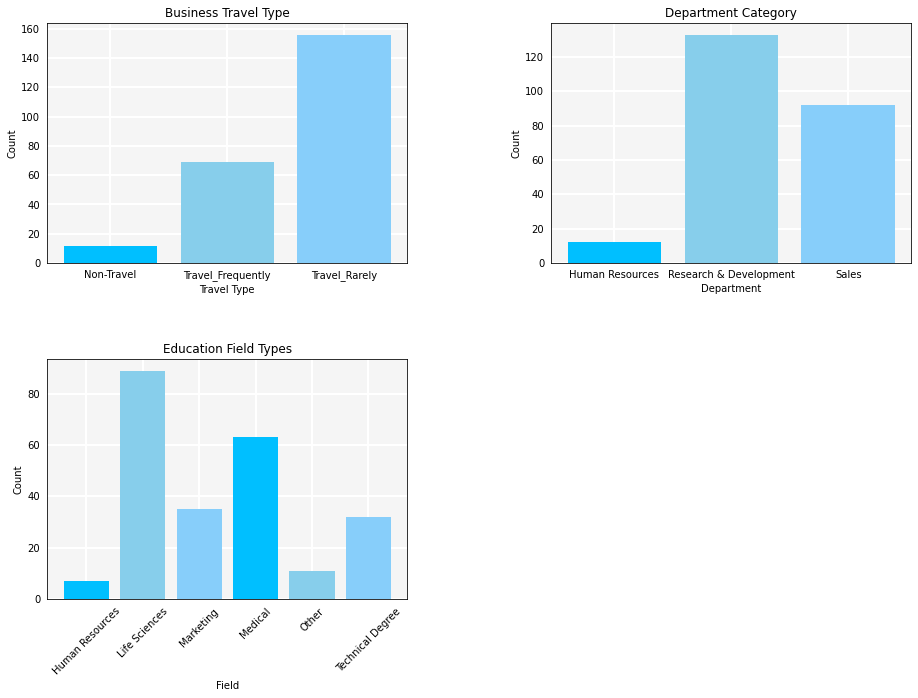

In [14]:
plt.rcParams.update({'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fitlered_data = data[data['Attrition'] == "Yes"]
plt.subplot(2,2,1)
xaxis,counts = np.unique(fitlered_data['BusinessTravel'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Business Travel Type")
plt.xlabel("Travel Type")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,2)
xaxis,counts = np.unique(fitlered_data['Department'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Department Category")
plt.xlabel("Department")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,3)
plt.xticks(rotation=45)
xaxis,counts = np.unique(fitlered_data['EducationField'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Education Field Types")
plt.xlabel("Field")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')
plt.show()


Inference : In compariso with the data where there is no Attrition, it can be concluded that attrition occours in people who travel frequently for business purposes and those who works majorly in the sales department.

Department : Human Resources



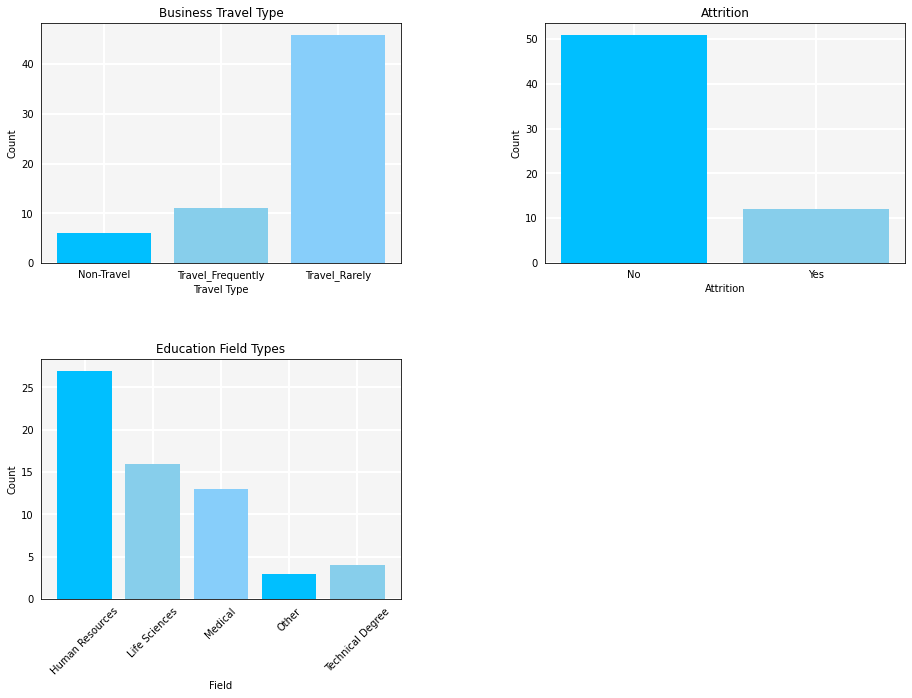

In [15]:
plt.rcParams.update({'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fitlered_data = data[data['Department'] == "Human Resources"]
plt.subplot(2,2,1)
xaxis,counts = np.unique(fitlered_data['BusinessTravel'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Business Travel Type")
plt.xlabel("Travel Type")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,2)
xaxis,counts = np.unique(fitlered_data['Attrition'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,3)
plt.xticks(rotation=45)
xaxis,counts = np.unique(fitlered_data['EducationField'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Education Field Types")
plt.xlabel("Field")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')


plt.show()

Inference : Employees of HR department mainly has their education field as Human Resources or Life Sciences.



Department : Research & Development



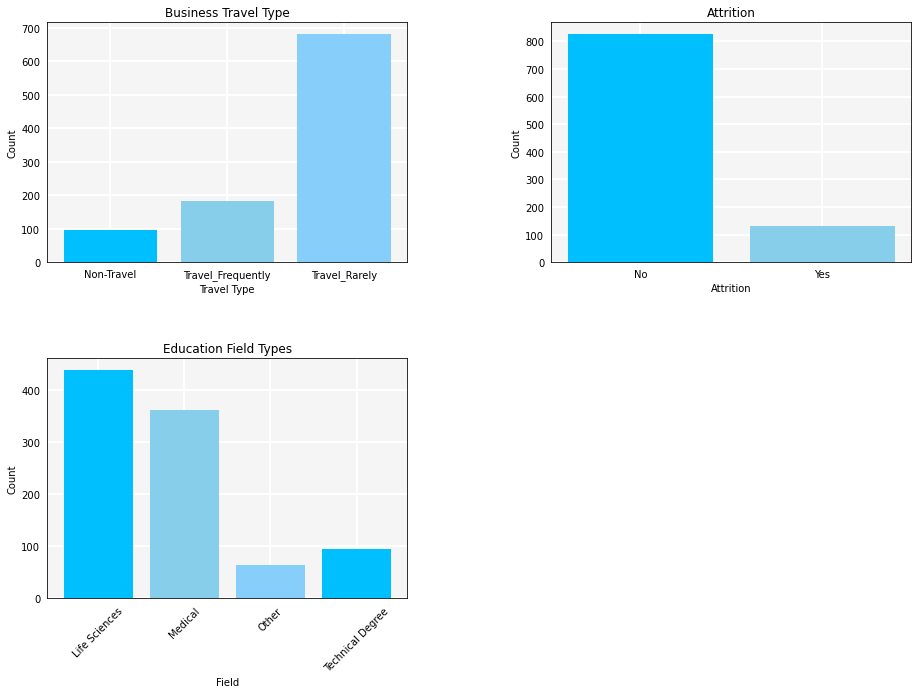

In [16]:
plt.rcParams.update({'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fitlered_data = data[data['Department'] == "Research & Development"]
plt.subplot(2,2,1)
xaxis,counts = np.unique(fitlered_data['BusinessTravel'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Business Travel Type")
plt.xlabel("Travel Type")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,2)
xaxis,counts = np.unique(fitlered_data['Attrition'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,3)
plt.xticks(rotation=45)
xaxis,counts = np.unique(fitlered_data['EducationField'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Education Field Types")
plt.xlabel("Field")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')


plt.show()

Inference : Employees of R&D has their education field in Life Sciences and Medical with Technical Degree being the third highest.



Department : Sales



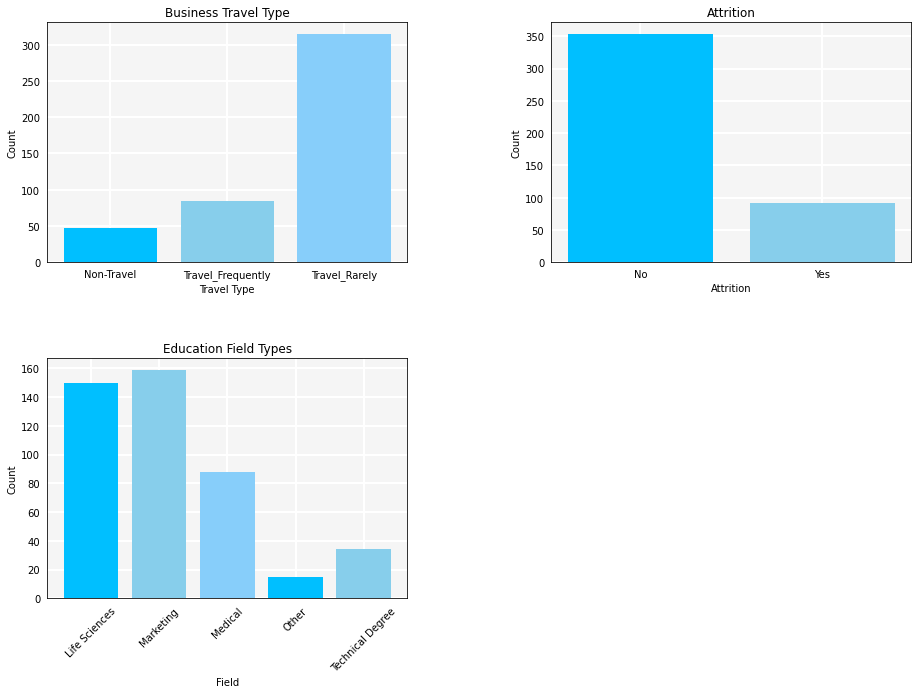

In [17]:
plt.rcParams.update({'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fitlered_data = data[data['Department'] == "Sales"]
plt.subplot(2,2,1)
xaxis,counts = np.unique(fitlered_data['BusinessTravel'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Business Travel Type")
plt.xlabel("Travel Type")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,2)
xaxis,counts = np.unique(fitlered_data['Attrition'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,3)
plt.xticks(rotation=45)
xaxis,counts = np.unique(fitlered_data['EducationField'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Education Field Types")
plt.xlabel("Field")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')


plt.show()

Inference : Employess of Sales department has thier education field in Life Sciences,Marketing and Medical.



Education Field : Life Sciences



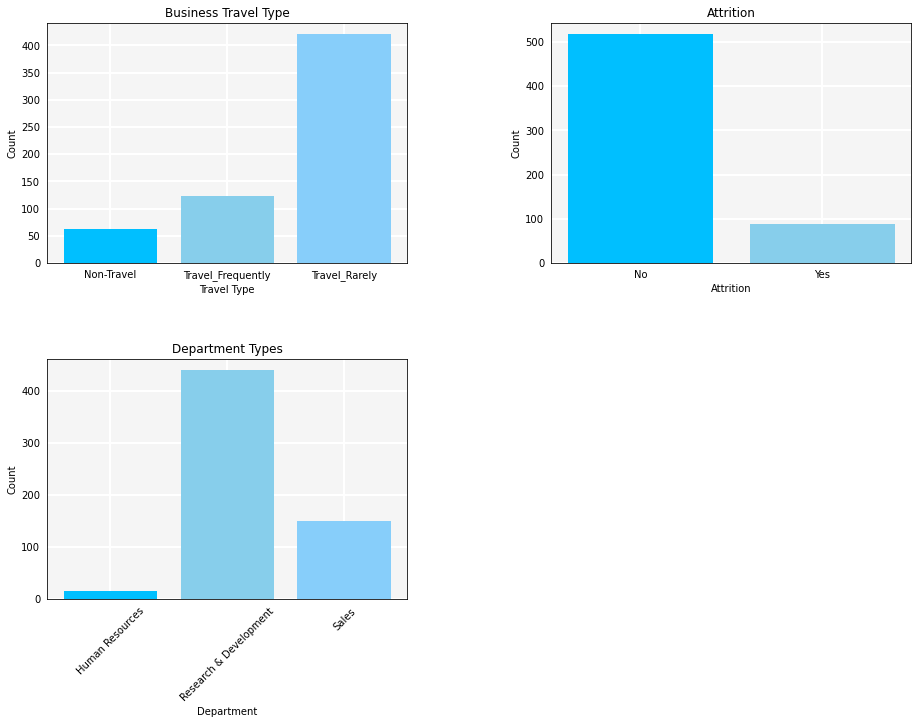

In [18]:
plt.rcParams.update({'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fitlered_data = data[data['EducationField'] == "Life Sciences"]
plt.subplot(2,2,1)
xaxis,counts = np.unique(fitlered_data['BusinessTravel'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Business Travel Type")
plt.xlabel("Travel Type")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,2)
xaxis,counts = np.unique(fitlered_data['Attrition'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,3)
plt.xticks(rotation=45)
xaxis,counts = np.unique(fitlered_data['Department'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Department Types")
plt.xlabel("Department")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.show()

Inference : Employees of Life Sciences mainly work in R&D Department.



Education Field : Marketing



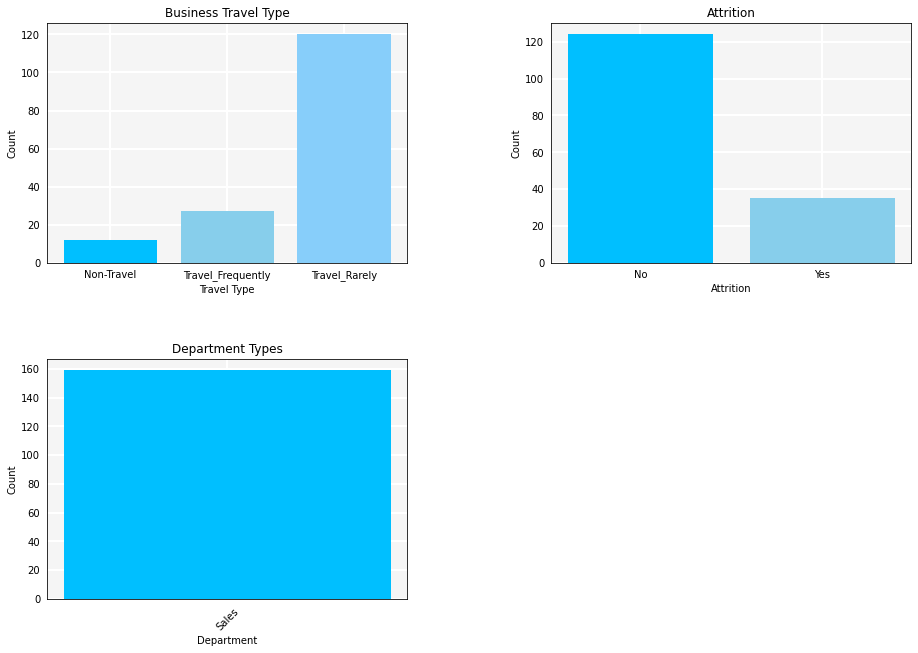

In [19]:
plt.rcParams.update({'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fitlered_data = data[data['EducationField'] == "Marketing"]
plt.subplot(2,2,1)
xaxis,counts = np.unique(fitlered_data['BusinessTravel'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Business Travel Type")
plt.xlabel("Travel Type")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,2)
xaxis,counts = np.unique(fitlered_data['Attrition'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,3)
plt.xticks(rotation=45)
xaxis,counts = np.unique(fitlered_data['Department'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Department Types")
plt.xlabel("Department")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')


plt.show()


Inference : Employees of Marketing Education Field mainly work in Sales Department.



Education Field : Medical



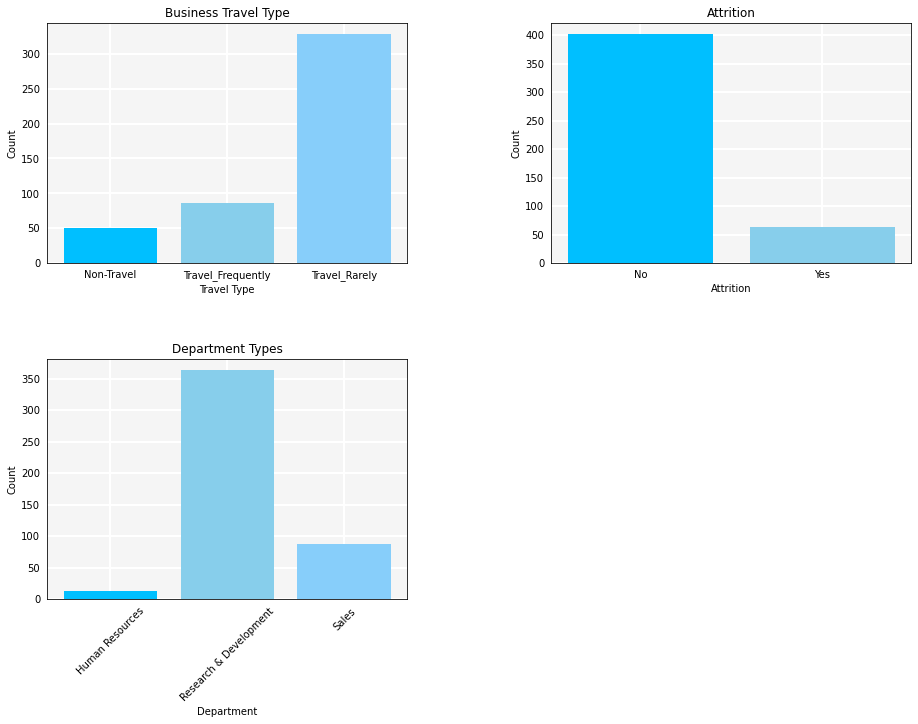

In [20]:
plt.rcParams.update({'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fitlered_data = data[data['EducationField'] == "Medical"]
plt.subplot(2,2,1)
xaxis,counts = np.unique(fitlered_data['BusinessTravel'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Business Travel Type")
plt.xlabel("Travel Type")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,2)
xaxis,counts = np.unique(fitlered_data['Attrition'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,3)
plt.xticks(rotation=45)
xaxis,counts = np.unique(fitlered_data['Department'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Department Types")
plt.xlabel("Department")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')


plt.show()

Inference : Employees of Medical Education Field mainly work in R&D Department.



Education Field : Other



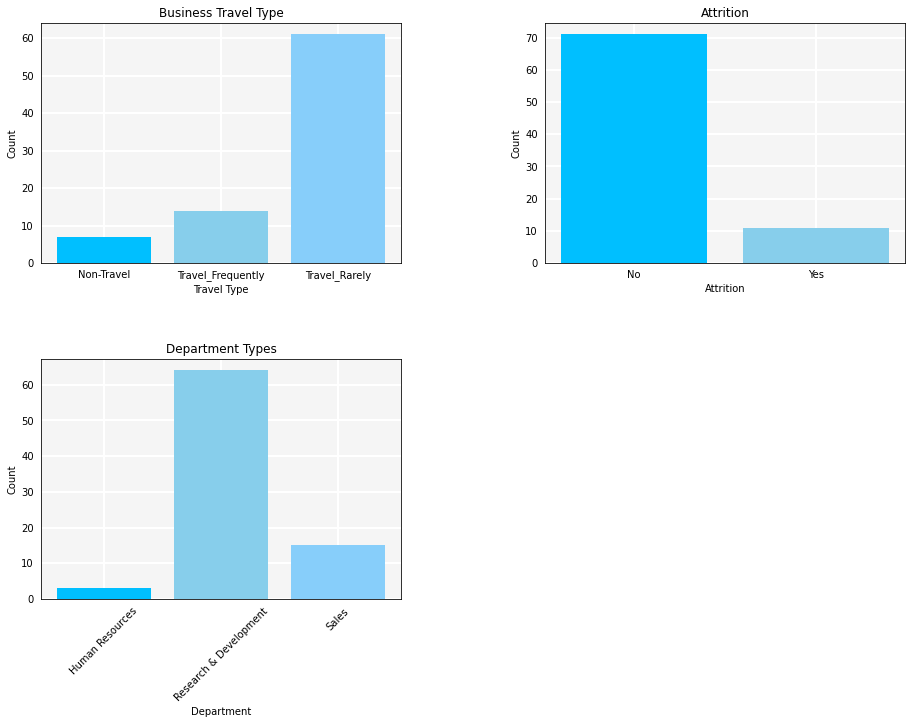

In [21]:
plt.rcParams.update({'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fitlered_data = data[data['EducationField'] == "Other"]
plt.subplot(2,2,1)
xaxis,counts = np.unique(fitlered_data['BusinessTravel'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Business Travel Type")
plt.xlabel("Travel Type")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,2)
xaxis,counts = np.unique(fitlered_data['Attrition'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,3)
plt.xticks(rotation=45)
xaxis,counts = np.unique(fitlered_data['Department'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Department Types")
plt.xlabel("Department")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')


plt.show()

Inference : Employees of Other education fields mainly work in R&d and Sales Departments.



Education Field : Technical Degree



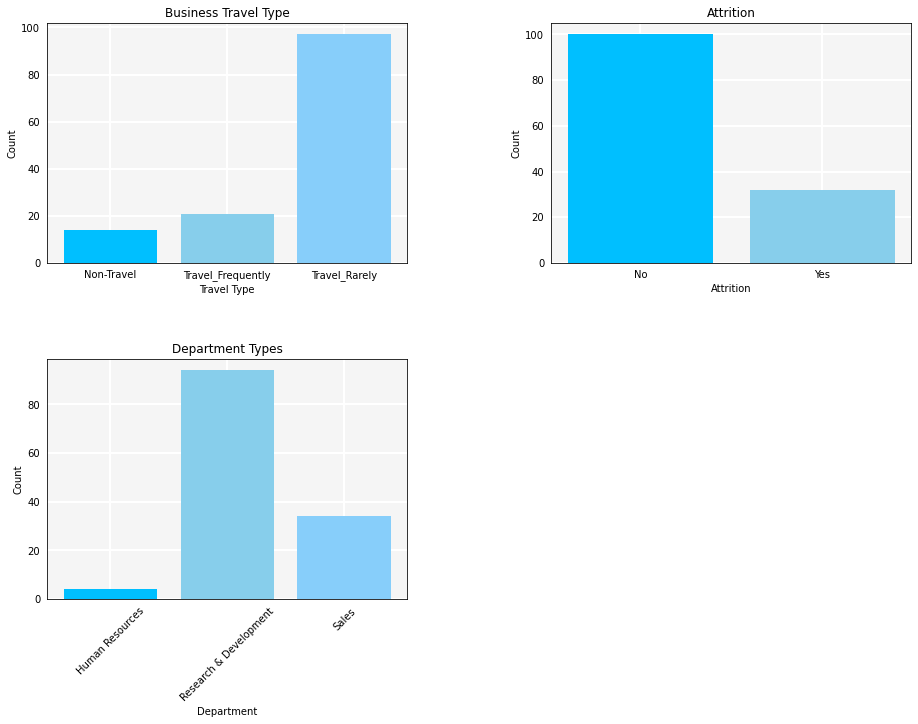

In [22]:
plt.rcParams.update({'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fitlered_data = data[data['EducationField'] == "Technical Degree"]
plt.subplot(2,2,1)
xaxis,counts = np.unique(fitlered_data['BusinessTravel'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Business Travel Type")
plt.xlabel("Travel Type")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,2)
xaxis,counts = np.unique(fitlered_data['Attrition'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')

plt.subplot(2,2,3)
plt.xticks(rotation=45)
xaxis,counts = np.unique(fitlered_data['Department'],return_counts=True)
plt.bar(xaxis,counts,zorder=3,color=['deepskyblue','skyblue','lightskyblue'])
plt.tick_params(left=False,bottom=False)
plt.title("Department Types")
plt.xlabel("Department")
plt.ylabel("Count")
plt.grid(True,linewidth=2.0,alpha=1,zorder=0,color='white')


plt.show()


Inference : Employees of Technical Degeree Education Field mainly works in R&D Department.



In [23]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

Use LabelEncoder() to encode the Text-based features into Integers.



In [24]:
data["Attrition"] = LabelEncoder().fit_transform(data['Attrition'])
data["BusinessTravel"] = LabelEncoder().fit_transform(data['BusinessTravel'])
data["Department"] = LabelEncoder().fit_transform(data['Department'])
data["EducationField"] = LabelEncoder().fit_transform(data['EducationField'])
data["Gender"] = LabelEncoder().fit_transform(data['Gender'])
data["JobRole"] = LabelEncoder().fit_transform(data['JobRole'])
data["MaritalStatus"] = LabelEncoder().fit_transform(data['MaritalStatus'])
data["Over18"] = LabelEncoder().fit_transform(data['Over18'])
data["OverTime"] = LabelEncoder().fit_transform(data['OverTime'])

In [25]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,4,...,4,80,0,17,3,2,9,6,0,8


Modelling


1.Over sample the dataset using SMOTE


2.Model the oversampled dataset


In [27]:
cols = list(data.columns)
cols.remove("Attrition")
sampled,target = SMOTE().fit_resample(data[cols],data["Attrition"])


In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(sampled[cols],
                                                 target,
                                                 test_size = 0.3,
                                                 shuffle=True)

In [29]:
print("Train Feature Size : ",len(X_train))
print("Train Label Size : ",len(Y_train))
print("Test Feature Size : ",len(X_test))
print("Test Label Size : ",len(Y_test))

Train Feature Size :  1726
Train Label Size :  1726
Test Feature Size :  740
Test Label Size :  740


Logistic Regression Model


Train Accuracy : 0.85 %
Test Accuracy : 0.81 %


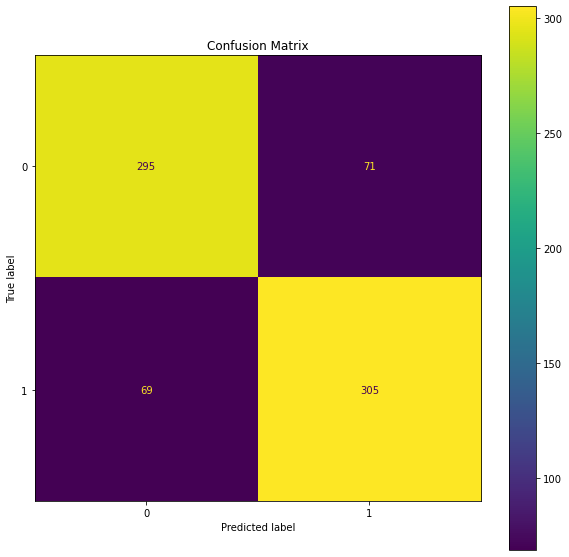

In [31]:
logistic_model = LogisticRegression(solver='liblinear',random_state=0).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,logistic_model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

Random Forest Model


Train Accuracy : 1.00 %
Test Accuracy : 0.89 %


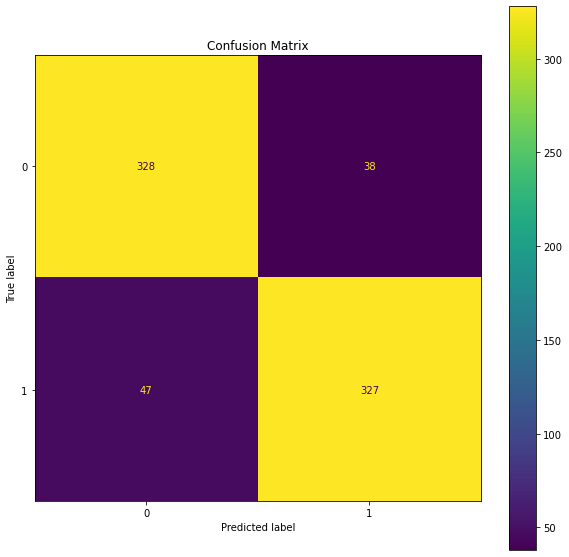

In [32]:
random_forest = RandomForestClassifier(n_estimators=590,
                                       random_state=0).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()


Inference : Thus, the model performs in a good manner with 91% accuracy and relatively less misclassifications.

